In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import sklearn
from torch.utils.data import DataLoader
from torchvision.io import read_image
from torchvision import datasets, transforms
from torchsummary import summary
from MSE_VAE import Encoder, Decoder, posteriors
from tqdm import tqdm
from sklearn.manifold import TSNE
from sklearn.mixture import GaussianMixture
from pickle import dump, load

/home/adarsh/anaconda3/envs/mtech-ai/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
device = 'cuda:1'
path = '/home/adarsh/ADRL/datasets/img_align_celeba'
modelpath = '/home/adarsh/ADRL/assignment_1/VAE/model_lg.pt'
latentpath = '/home/adarsh/ADRL/assignment_1/VAE/Z_04.npy'
gmmpath = '/home/adarsh/ADRL/assignment_1/VAE/gmm_04.pkl'
figpath = '/home/adarsh/ADRL/assignment_1/VAE/demo.jpg'

In [3]:
model = torch.nn.Sequential(
    Encoder(),
    Decoder()
)

model.load_state_dict(torch.load(modelpath))
model = model.to(device)

gmm = load(open(gmmpath, 'rb'))

Randomly generate images

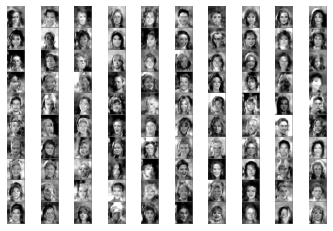

In [4]:
for i in range(100):
    z = gmm.sample()[0]
    z = np.reshape(z, (1, 23, 18))
    Y = model[1](torch.tensor(z).to(device).float())
    plt.subplot(10,10,i+1)
    plt.imshow(Y.squeeze().detach().cpu().numpy(), 'gray')
    plt.axis('off')
    plt.subplots_adjust(wspace=0, hspace=0)
plt.savefig(figpath, dpi=300, bbox_inches='tight')

/home/adarsh/anaconda3/envs/mtech-ai/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/adarsh/anaconda3/envs/mtech-ai/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


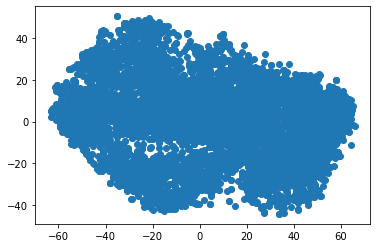

In [5]:
Z = np.load(latentpath, allow_pickle=True)
idx = np.random.choice(np.arange(len(Z)), 5000, replace=False)
sub_Z = Z[idx]

sub_Z = TSNE().fit_transform(np.reshape(sub_Z,(len(sub_Z), 23*18)))
plt.scatter(sub_Z[:,0], sub_Z[:,1])
plt.show()